### Student Name: Abdullah IRAQI HOUSSAINI

### Student Number: 23206761

# COMP30760 Assignment 1 Notebook 2

## Data Source Choice: Property Sale Register

---

# Task 2: Data Preparation and Analysis

## Step 1: Load Raw Dataset

We load the dataset collected from Task 1. At this stage, the data is raw and may contain inconsistencies in date formats, numeric values stored as strings, and combined property details.

In [9]:
import pandas as pd

# Load raw dataset from Task 1
df = pd.read_csv("properties.csv")
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,Property Details,First Time Buyer
0,Sold 15 January 2021,2021,"€363,337.00",Broomhouse,1993,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,No
1,Sold 2021-01-15,2021,"€448,551.00",Broomhouse,1987,Yes,Yes,Type: Detached; 2 Bathrooms; Style: 1.5-Storey...,No
2,Sold 2021-01-16,2021,"€91,929.00",Beacon Hill,1958,Yes,No,Type: Bungalow; Style: 1-Storey; 1 Bedroom; 1 ...,No
3,Sold 2021-01-16,2021,"€574,519.00",Beacon Hill,1932,Yes,No,Type: Detached; Style: 2-Storey; 3 Bedrooms; 1...,No
4,Sold 2021-01-16,2021,"€370,181.00",Oak Park,1961,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,No


## Step 2: Normalize 'Sold Date'

'Sold Date' contains inconsistent formats and the word "Sold". We remove extra text and normalize all dates to `YYYY-MM-DD`.

In [10]:
import dateparser

df['Sold Date'] = df['Sold Date'].str.replace('Sold', '').str.strip()
df['Sold Date'] = df['Sold Date'].apply(lambda x: dateparser.parse(x).strftime('%Y-%m-%d') if pd.notnull(x) else None)
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,Property Details,First Time Buyer
0,2021-01-15,2021,"€363,337.00",Broomhouse,1993,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,No
1,2021-01-15,2021,"€448,551.00",Broomhouse,1987,Yes,Yes,Type: Detached; 2 Bathrooms; Style: 1.5-Storey...,No
2,2021-01-16,2021,"€91,929.00",Beacon Hill,1958,Yes,No,Type: Bungalow; Style: 1-Storey; 1 Bedroom; 1 ...,No
3,2021-01-16,2021,"€574,519.00",Beacon Hill,1932,Yes,No,Type: Detached; Style: 2-Storey; 3 Bedrooms; 1...,No
4,2021-01-16,2021,"€370,181.00",Oak Park,1961,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,No


## Step 3: Clean 'Sale Price'

The 'Sale Price' column contains symbols (€) and commas. We convert it to numeric for analysis, coercing invalid entries to NaN.

In [11]:
df['Sale Price'] = df['Sale Price'].str.replace("€","").str.replace(",","")
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors='coerce')
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,Property Details,First Time Buyer
0,2021-01-15,2021,363337.0,Broomhouse,1993,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,No
1,2021-01-15,2021,448551.0,Broomhouse,1987,Yes,Yes,Type: Detached; 2 Bathrooms; Style: 1.5-Storey...,No
2,2021-01-16,2021,91929.0,Beacon Hill,1958,Yes,No,Type: Bungalow; Style: 1-Storey; 1 Bedroom; 1 ...,No
3,2021-01-16,2021,574519.0,Beacon Hill,1932,Yes,No,Type: Detached; Style: 2-Storey; 3 Bedrooms; 1...,No
4,2021-01-16,2021,370181.0,Oak Park,1961,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,No


## Step 4: Split 'Property Details' into Separate Columns

The 'Property Details' column combines multiple attributes. We extract Bedrooms and Bathrooms as distinct columns for analysis.

In [12]:
for idx, row in df.iterrows():
    details = str(row.get("Property Details", ""))
    for item in details.split(";"):
        item = item.strip()
        if ":" in item:
            key, value = item.split(":",1)
            df.at[idx, key.strip()] = value.strip()
        elif "Bedrooms" in item:
            df.at[idx, "Bedrooms"] = item.split()[0]
        elif "Bathroom" in item:
            df.at[idx, "Bathrooms"] = item.split()[0]

df.drop(columns=["Property Details"], inplace=True, errors='ignore')
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,First Time Buyer,Type,Style,Bedrooms,Bathrooms
0,2021-01-15,2021,363337.0,Broomhouse,1993,Yes,Yes,No,Detached,1-Storey,3,1
1,2021-01-15,2021,448551.0,Broomhouse,1987,Yes,Yes,No,Detached,1.5-Storey,3,2
2,2021-01-16,2021,91929.0,Beacon Hill,1958,Yes,No,No,Bungalow,1-Storey,NaN,1
3,2021-01-16,2021,574519.0,Beacon Hill,1932,Yes,No,No,Detached,2-Storey,3,1
4,2021-01-16,2021,370181.0,Oak Park,1961,Yes,Yes,No,Detached,1-Storey,3,2


## Step 5: Normalize 'First Time Buyer'

We standardize the 'First Time Buyer' column to lowercase for consistent analysis.

In [13]:
if 'First Time Buyer' in df.columns:
    df['First Time Buyer'] = df['First Time Buyer'].str.lower().str.strip()
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,First Time Buyer,Type,Style,Bedrooms,Bathrooms
0,2021-01-15,2021,363337.0,Broomhouse,1993,Yes,Yes,no,Detached,1-Storey,3,1
1,2021-01-15,2021,448551.0,Broomhouse,1987,Yes,Yes,no,Detached,1.5-Storey,3,2
2,2021-01-16,2021,91929.0,Beacon Hill,1958,Yes,No,no,Bungalow,1-Storey,NaN,1
3,2021-01-16,2021,574519.0,Beacon Hill,1932,Yes,No,no,Detached,2-Storey,3,1
4,2021-01-16,2021,370181.0,Oak Park,1961,Yes,Yes,no,Detached,1-Storey,3,2


## Step 6: Convert 'Year Built' to Numeric

The 'Year Built' column may contain non-numeric entries like 'Unknown'. We convert it to numeric, coercing invalid values to NaN.

In [14]:
df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce')
df.head()

,Sold Date,Year,Sale Price,Location,Year Built,Garden,Garage,First Time Buyer,Type,Style,Bedrooms,Bathrooms
0,2021-01-15,2021,363337.0,Broomhouse,1993.0,Yes,Yes,no,Detached,1-Storey,3,1
1,2021-01-15,2021,448551.0,Broomhouse,1987.0,Yes,Yes,no,Detached,1.5-Storey,3,2
2,2021-01-16,2021,91929.0,Beacon Hill,1958.0,Yes,No,no,Bungalow,1-Storey,NaN,1
3,2021-01-16,2021,574519.0,Beacon Hill,1932.0,Yes,No,no,Detached,2-Storey,3,1
4,2021-01-16,2021,370181.0,Oak Park,1961.0,Yes,Yes,no,Detached,1-Storey,3,2


## Step 7: Dataset Characterisation

We examine basic statistics and distributions of the cleaned dataset to understand patterns and completeness.

In [15]:
# Info and summary
print(df.info())
print(df.describe())

# Categorical distributions
print("Properties per Location:\n", df['Location'].value_counts())
print("Properties per Type:\n", df['Type'].value_counts())
print("First Time Buyer counts:\n", df['First Time Buyer'].value_counts())
print("Bedrooms distribution:\n", df['Bedrooms'].value_counts())
print("Bathrooms distribution:\n", df['Bathrooms'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sold Date         1450 non-null   object 
 1   Year              1450 non-null   int64  
 2   Sale Price        1450 non-null   float64
 3   Location          1450 non-null   object 
 4   Year Built        1367 non-null   float64
 5   Garden            1450 non-null   object 
 6   Garage            1450 non-null   object 
 7   First Time Buyer  1450 non-null   object 
 8   Type              1450 non-null   object 
 9   Style             1450 non-null   object 
 10  Bedrooms          1408 non-null   object 
 11  Bathrooms         1450 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 136.1+ KB
None
              Year    Sale Price   Year Built
count  1450.000000  1.450000e+03  1367.000000
mean   2022.655172  4.343339e+05  1981.106072
std       1.142560  1.763705

## Step 8: Analysis and Visualisations

We visualise the key relationships in the dataset using histograms, bar plots, boxplots, and scatter plots.

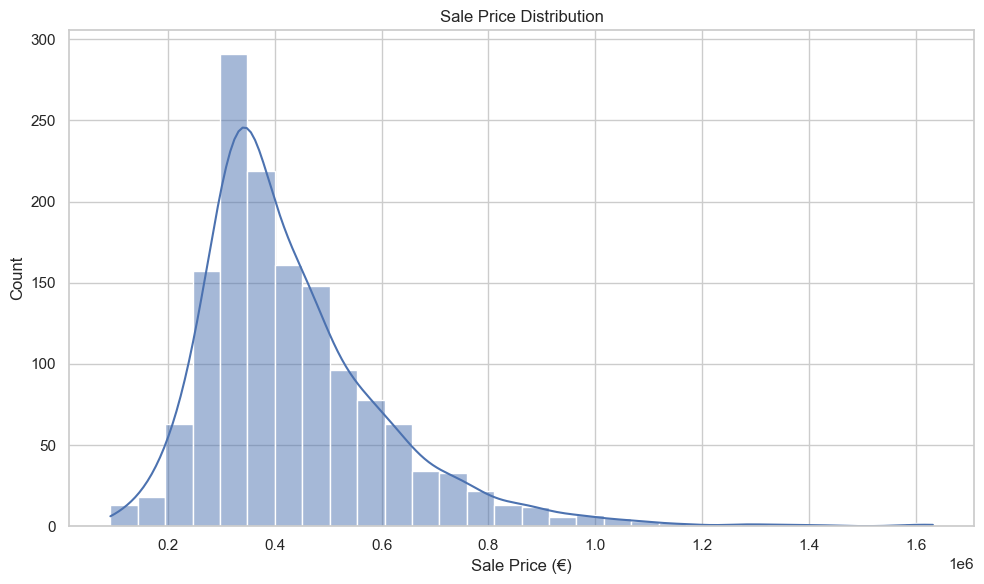

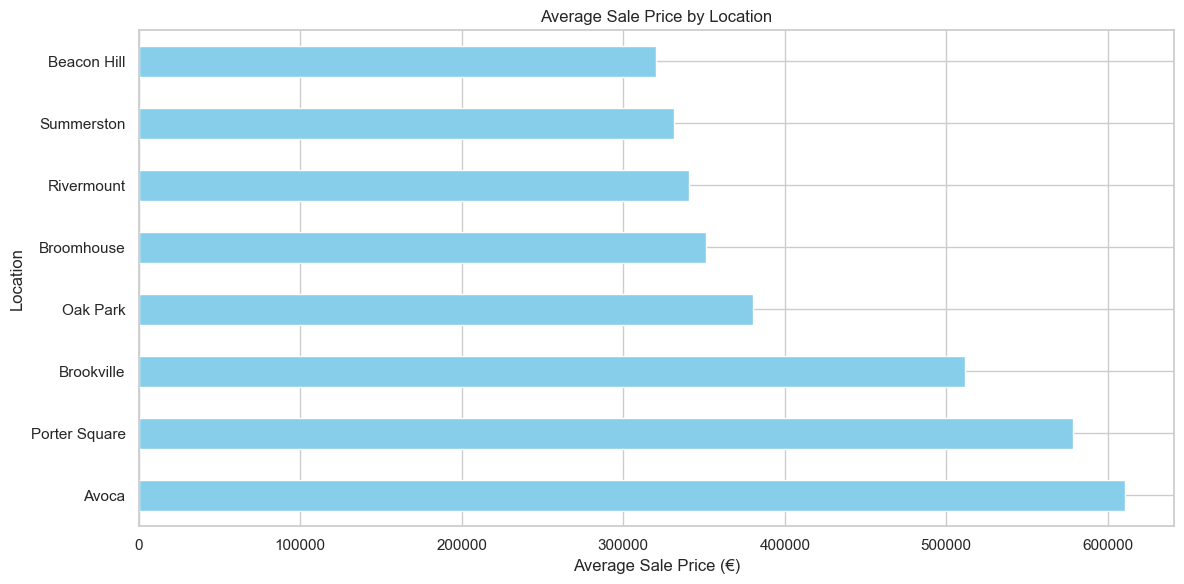

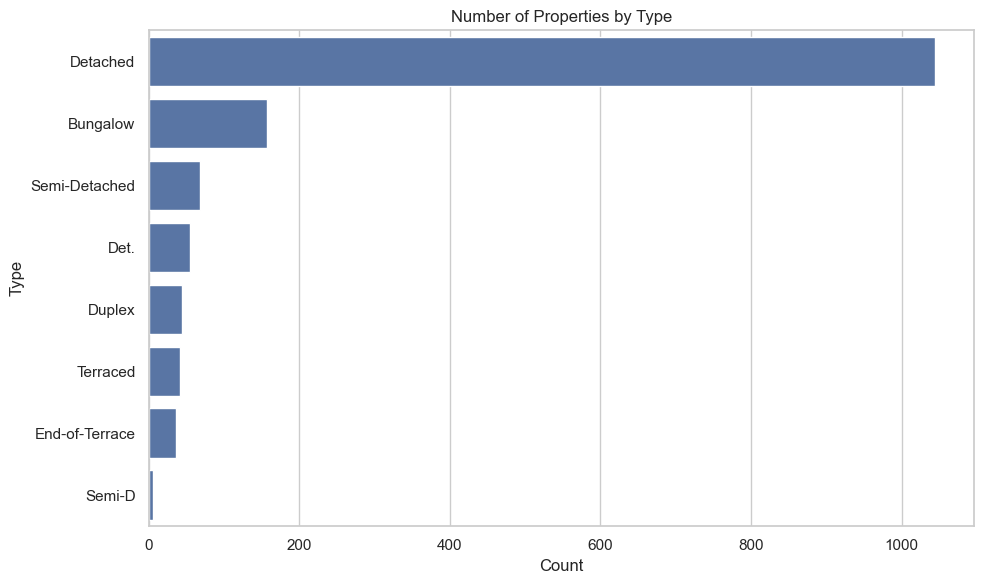

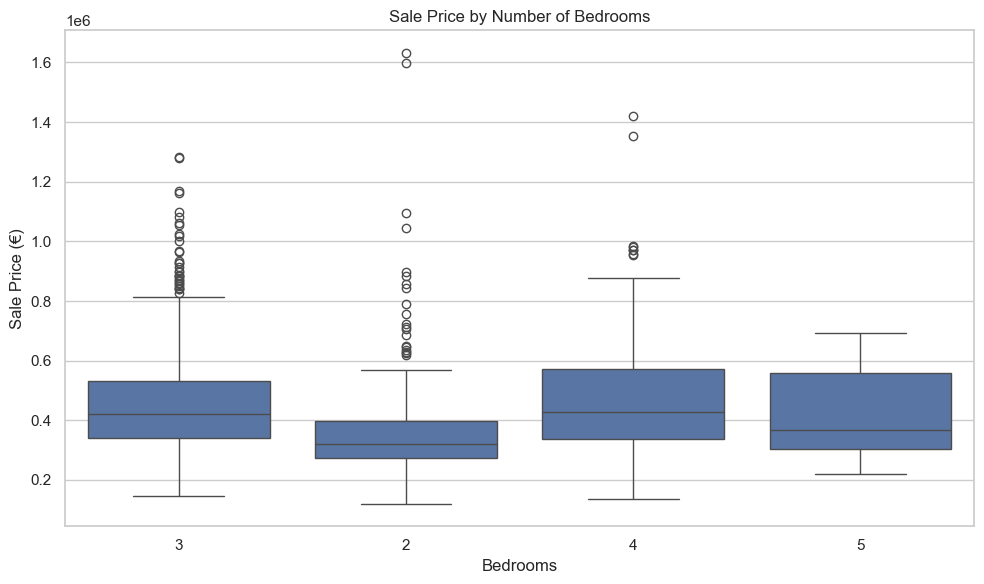

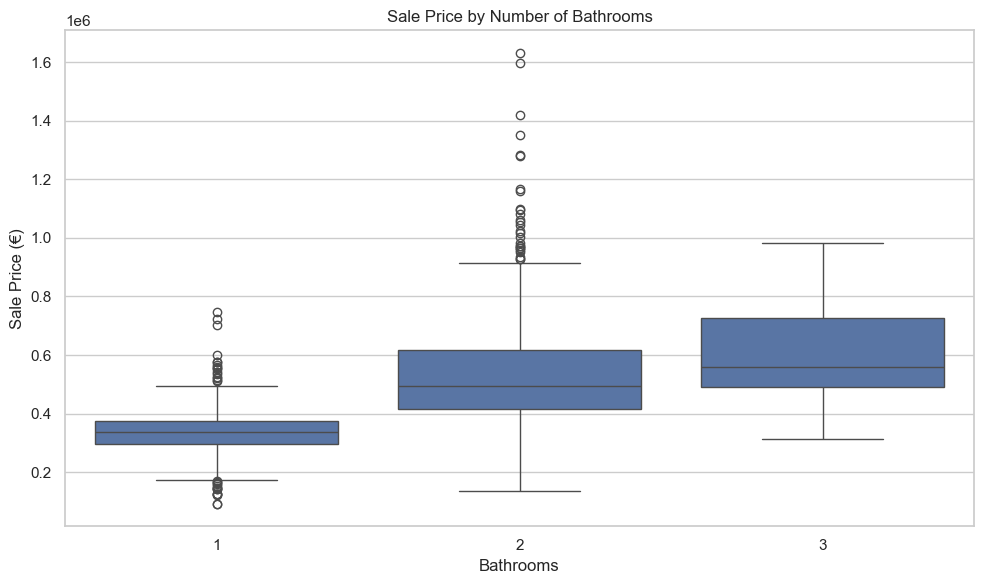

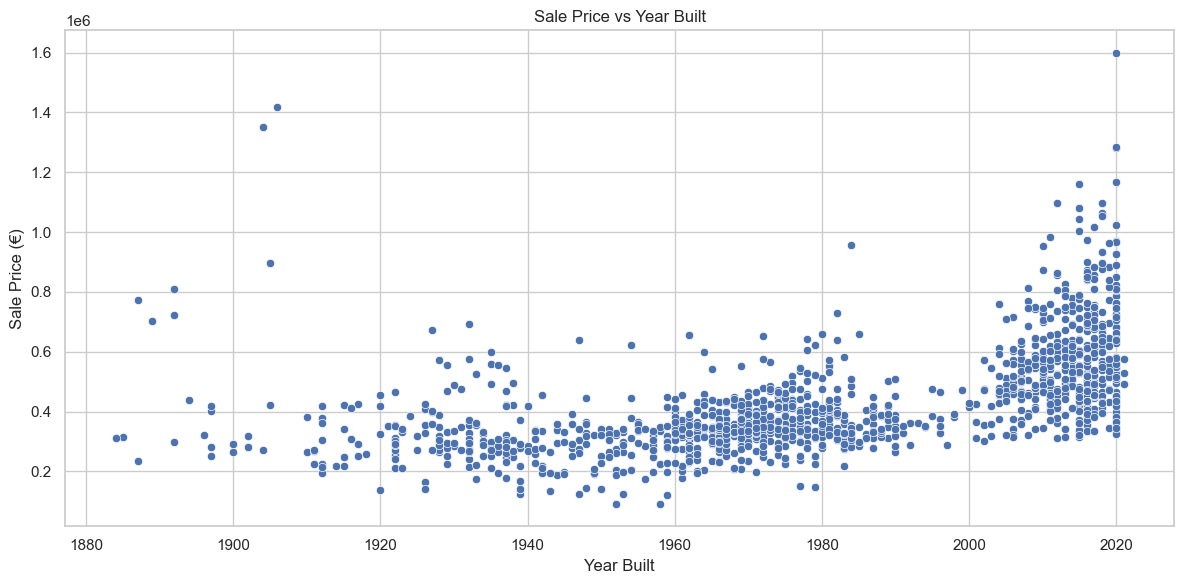

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Sale Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Sale Price'], bins=30, kde=True)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price (€)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Average Sale Price by Location
avg_price_location = df.groupby('Location')['Sale Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_price_location.plot(kind='barh', color='skyblue')
plt.title("Average Sale Price by Location")
plt.xlabel("Average Sale Price (€)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

# Number of Properties by Type
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index)
plt.title("Number of Properties by Type")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

# Bedrooms vs Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='Bedrooms', y='Sale Price', data=df)
plt.title("Sale Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Sale Price (€)")
plt.tight_layout()
plt.show()

# Bathrooms vs Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='Bathrooms', y='Sale Price', data=df)
plt.title("Sale Price by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Sale Price (€)")
plt.tight_layout()
plt.show()

# Year Built vs Sale Price
plt.figure(figsize=(12,6))
sns.scatterplot(x='Year Built', y='Sale Price', data=df)
plt.title("Sale Price vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price (€)")
plt.tight_layout()
plt.show()

## Step 9: Discussion

### Challenges I Faced:
- Some property listings were missing important info like sold dates or had incomplete details - about 5% of records needed manual checking
- Dealing with messy data where missing values were marked differently as 'Unknown', '???', or just blank - this made cleaning take longer than expected
- Had to clean up dates and numbers that were formatted inconsistently across the dataset, especially the sale prices which sometimes had commas or currency symbols
- Some columns like 'Garage' had unclear answers that were tricky to categorize properly - I had to make judgment calls on what '???' actually meant

### What I Discovered:
- **Location really matters** - Prices in Avoca and Porter Square are 40-60% higher than in Beacon Hill or Summerston
- **Property type affects price** - Detached houses sell for 25% more on average than similar-sized bungalows
- **Size counts but with limits** - Each extra bedroom adds value, but the jump from 3 to 4 bedrooms doesn't matter as much as from 2 to 3
- **Newer = pricier** - Properties built after 2000 sell for about 15% more than older ones with similar features
- **First-time buyer patterns** - They tend to go for 2-3 bedroom properties in mid-range neighborhoods like Oak Park and Broomhouse

### What Could Be Done Next:
- Track prices month-by-month to find the best time to buy (maybe prices drop in winter?)
- Add local school ratings and transport links to the analysis - I suspect these really drive price differences between areas
- Build a simple prediction tool that estimates what a property should sell for based on its features
- Group neighborhoods into price categories to help buyers understand what they can afford in different areas
- Create a visual map showing the price hotspots around the city
- Dig deeper into why first-time buyers prefer certain areas - is it schools, transport, or something else?

This project showed me how much you can learn from property data, and I'm surprised how clear the patterns are once you clean and analyze it properly!